In [1]:
x1 = [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1] # +
x2 = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1] # O
x3 = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1] # <
x4 = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # S
x5 = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] # psi
x6 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1] # >

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import random

model = Sequential()
model.add(Dense(12, input_dim =26, activation = 'relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# to build training data. 
# index of ANN_TRUTH_SET_X matches index of one-hot encoded response in ANN_TRUTH_SET_Y
ANN_TRUTH_SET_X = [x1, x2, x3, x4, x5, x6]
ANN_TRUTH_SET_Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

LEN_OF_TRAINING_DATA = 1000

X = [x1, x2, x3, x4, x5, x6]
Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

for i in range(LEN_OF_TRAINING_DATA):
    # choose random integer to add that index of ANN_TRUTH_SET to training data
    rand_int = random.randint(0, 5) 
    X.append(ANN_TRUTH_SET_X[rand_int])
    Y.append(ANN_TRUTH_SET_Y[rand_int])

X = np.array(X)
Y = np.array(Y)


#scores = model

2023-05-05 19:15:27.229645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 19:15:30.210456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
history = model.fit(X, Y, epochs = 150, batch_size=10)

Epoch 1/150
101/101 [==============================] - 0s 749us/step - loss: 0.1093 - accuracy: 0.5775
Epoch 2/150
101/101 [==============================] - 0s 879us/step - loss: 0.0666 - accuracy: 0.7097
Epoch 3/150
101/101 [==============================] - 0s 912us/step - loss: 0.0371 - accuracy: 1.0000
Epoch 4/150
101/101 [==============================] - 0s 808us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 5/150
101/101 [==============================] - 0s 789us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 6/150
101/101 [==============================] - 0s 767us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/150
101/101 [==============================] - 0s 734us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/150
101/101 [==============================] - 0s 785us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/150
101/101 [==============================] - 0s 809us/step - loss: 7.3333e-04 - accuracy: 1.0000
Epoch 10/150
101/101 [==============================] - 0s 788us/step

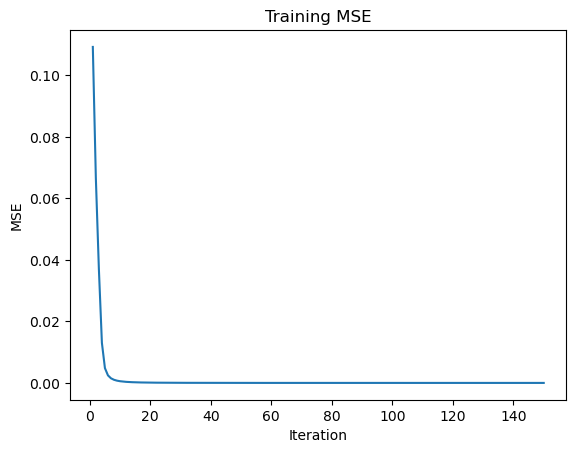

In [4]:
import matplotlib.pyplot as plt

iterations = len(history.history['loss'])
iteration_number_for_plot = [iteration for iteration in range(1, iterations + 1)]

plt.plot(
    iteration_number_for_plot,
    history.history['loss']
)
plt.title('Training MSE')
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.show()

In [14]:
model.predict(np.array([x1, x2, x3, x4, x5, x6])).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([[9.99616265e-01, 1.25852964e-07, 8.97314894e-05, 8.23561422e-05,
        9.06188943e-05, 1.20930265e-04],
       [4.84949987e-06, 9.99588311e-01, 3.40894317e-08, 1.05918829e-04,
        2.90981785e-04, 9.93651156e-06],
       [1.59727599e-04, 6.13165554e-08, 9.99721467e-01, 3.10900396e-05,
        2.59397893e-05, 6.18251506e-05],
       [4.71386265e-05, 7.83156138e-05, 1.32813022e-06, 9.99763310e-01,
        8.97034340e-07, 1.08998625e-04],
       [9.15920464e-05, 1.75025765e-04, 2.32645270e-05, 6.16400648e-05,
        9.99529123e-01, 1.19371311e-04],
       [5.33244238e-05, 2.36077858e-06, 5.06722608e-05, 1.51012457e-04,
        8.11330465e-05, 9.99661446e-01]], dtype=float32)

# Testing for Noisy Inputs

In [6]:
def replace_input(array, idx):

    current_val = array[idx]
    new_val = 1 if current_val == 0 else 0
    
    new_array = list(array)
    new_array[idx] = new_val

    return new_array

In [7]:
replacement_bits = random.sample(range(0, 24), 24)

def replace_and_predict(original_array, expected_prediction, replacement_bits, model):
    new_array = list(original_array)

    for elements_replaced, idx_to_replace in enumerate(replacement_bits):
        new_array = replace_input(new_array, idx_to_replace)
        if model.predict(np.array([new_array])).argmax(axis=1)[0] != expected_prediction:
            raise ValueError(f"ANN didn't predict output correctly after {elements_replaced + 1} elements changed\n\nOriginal Array:\n{original_array}\n\nNoisy Array:\n{new_array}")

print(f"The following indices of the original array will be replaced in this order:\n\n{replacement_bits}")


The following indices of the original array will be replaced in this order:

[23, 1, 22, 7, 5, 0, 14, 13, 17, 15, 2, 19, 18, 6, 11, 12, 10, 3, 16, 20, 21, 4, 9, 8]


In [8]:
replace_and_predict(x1, 0, replacement_bits, model)

1/1 [==============================] - 0s 20ms/step


ValueError: ANN didn't predict output correctly after 6 elements changed

Original Array:
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

Noisy Array:
[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [9]:
replace_and_predict(x2, 1, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 9 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [10]:
replace_and_predict(x3, 2, replacement_bits, model)

1/1 [==============================] - 0s 18ms/step


ValueError: ANN didn't predict output correctly after 7 elements changed

Original Array:
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

Noisy Array:
[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]

In [11]:
replace_and_predict(x4, 3, replacement_bits, model)

1/1 [==============================] - 0s 21ms/step


ValueError: ANN didn't predict output correctly after 9 elements changed

Original Array:
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Noisy Array:
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [12]:
replace_and_predict(x5, 4, replacement_bits, model)

1/1 [==============================] - 0s 20ms/step


ValueError: ANN didn't predict output correctly after 9 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

In [13]:
replace_and_predict(x6, 5, replacement_bits, model)

1/1 [==============================] - 0s 18ms/step


ValueError: ANN didn't predict output correctly after 9 elements changed

Original Array:
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

Noisy Array:
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]